# Superresolution Dev

In [3]:
import importlib
import confocal
importlib.reload(confocal)

import glob, os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import imageio
import re
from scipy.ndimage.morphology import binary_dilation
from scipy.ndimage.measurements import center_of_mass
from scipy.interpolate import interp2d,RegularGridInterpolator
from random import random
from tqdm import tqdm
from scipy.interpolate import interp1d

from itertools import accumulate
from skimage.measure import find_contours
from scipy.spatial import ConvexHull
from skimage import io

## SR1

In [4]:
# Special exporting
import imageio

def export_sr_tifs(target_dir, source_folder, fname_stub='Intensity_Z', as_colors=None):

    fnames_tif = list(sorted(glob.glob(os.path.join(source_folder,'*.tif'))))
    print(len(fnames_tif))
    
    os.makedirs(os.path.join(target_dir, 'Intensity.png.export/'),exist_ok=True)

    for i,fname in enumerate(fnames_tif):
#         print()
        data = io.imread(fname)
        print(fname_stub+'%03d' % i, data.shape)
        
        # io.imsave(os.path.join(target_dir, fname_stub+'%03d.png' % i),data)
        imageio.imwrite(os.path.join(target_dir, fname_stub+'%03d.png' % i),data, format='PNG-FI')

        
base_dir = 'datasets/SR1/'
specific_ds = 'Export - Original Channel tiff Stack/'
export_sr_tifs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
               os.path.join(base_dir,specific_ds))


#     im = io.imread(fname_tif)
#     print('Data shape:', im.shape)

#     n_channels = len(im)
#     if as_colors is None:
#         as_colors = list(range(3))
#         as_colors[1] = 1 if n_channels > 1 else 0
#         as_colors[2] = 2 if n_channels > 2 else 0
#     print('Using channel colors:', as_colors)

#     im = np.transpose(im, axes=[1,2,3,0])

#     for i in tqdm(range(len(im))):
#         data = np.array(im[i][:,:,as_colors],dtype=np.uint16)*16
#         # io.imsave(os.path.join(target_dir, fname_stub+'%03d.png' % i),data)
#         imageio.imwrite(os.path.join(target_dir, fname_stub+'%03d.png' % i),data, format='PNG-FI')

#     # target_dir = os.path.join('datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/', 'Intensity.png.export')
#     # im = Image.open(os.path.join('datasets/AFM Test 100x/AFM Test 2 - LMNA(g) Actin(r).export/', 'Intensity.tif.export',
#     #                              "Intensity_45Z_CH.ome.tif"))


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


35
Intensity_Z000 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z001 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z002 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z003 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z004 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z005 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z006 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z007 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z008 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z009 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z010 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z011 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z012 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z013 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z014 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z015 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z016 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z017 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z018 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z019 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z020 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z021 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z022 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z023 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z024 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z025 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z026 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z027 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z028 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z029 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z030 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z031 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z032 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z033 (2048, 2048, 3)


OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


Intensity_Z034 (2048, 2048, 3)


In [6]:
base_dir = 'datasets/SR1/'
specific_ds = 'Export - Original Channel tiff Stack/'
# break
if False:
    os.makedirs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),exist_ok=True)
    export_sr_tifs(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
                  os.path.join(base_dir,specific_ds,'Export_Nikon_Z01.tif'))
#     confocal.export_tif(os.path.join(base_dir,specific_ds,'Intensity.png.export/'),
#                     os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'),as_colors=[0,1,2])


confocal.max_projection_tif(os.path.join(base_dir,specific_ds,'Intensity.tif.export/Intensity_30Z_2CH.ome.tif'), do_save=True,do_plot=True,
                  destdir=os.path.join(base_dir,specific_ds), filedesc='afm_d1', as_colors=[1,1,0])

globular_full = os.path.join(base_dir,specific_ds,'Intensity.png.export/Intensity*.png') #'AFM Test 100x/AFM Oversampling - Deconvolution/Intensity.png.export/*.png'
print(len(glob.glob(globular_full)))
destdir = os.path.join(base_dir,specific_ds)
os.makedirs(os.path.join(destdir, 'objects'), exist_ok=True)
desc = 'afm_d1'
if True:
    confocal.max_projection(globular_full, do_plot=True, do_save=True, destdir=destdir, 
                    filedesc=desc,as_colors=[0,1,1])
plt.show()

SyntaxError: invalid syntax (<ipython-input-6-a33cf8caced4>, line 15)

In [ ]:
fnames = glob.glob('datasets/SR1/Export - RGB Merge tiff Stack/*.tif')
print(len(fnames))
print(fnames[0])

In [10]:

im = io.imread(fnames[0])

OME series: incompatible page shape (2048, 2048, 3); expected (3, 2048, 2048)


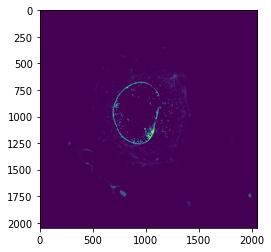

In [15]:
plt.imshow(im[:,:,0])

In [17]:
np.max(im)

255

In [ ]:
fnames_tif = list(sorted(glob.glob(os.path.join(folder,stub))))